# Exploratory Data Analysis

In this assignment we will work with data about the Titanic's passengers.

Objectives:
* to familiarize you with the seaborn library
* learn how to build different visualizations
* fill the gaps in the data
* encode categorical data

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Let's load the data.

In [78]:
df = pd.read_csv("titanic.csv")

### Task 1
Display the first 7 rows of the table and the table dimensions.

In [79]:
# your code here
print("First 7 rows of the table:")
print(df.head(7))

# displaying the dimensions of the table here
print("\nDimensions of the table:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

First 7 rows of the table:
   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   
5          NaN       NaN     NaN   
6          7.0       0.0     1.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0    1.0   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen; Miss. Laina  female  26.0    0.0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen; Mr. William Henry    male  35.0    0.0   
5                                                NaN     NaN   NaN    NaN   
6                            McCarthy; Mr. Timothy J    male  54.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0      

# Feature Processing

1) Find columns that have missing values and process these missing values

2) Translate categorical features into numerical

### Task 2 
Output the basic numerical characteristics of the numerical columns. The method `.describe()` can be very usefull here.

In [80]:
# your code here
print("Basic numerical characteristics:")
print(df.describe())

Basic numerical characteristics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   886.000000  886.000000  886.000000  711.000000  886.000000   
mean    448.316027    0.383747    2.305869   29.743094    0.523702   
std     256.211467    0.486572    0.837071   14.505873    1.105202   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     227.250000    0.000000    2.000000   20.750000    0.000000   
50%     448.500000    0.000000    3.000000   28.000000    0.000000   
75%     669.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  886.000000  886.000000  
mean     0.375847   32.279387  
std      0.791082   49.817969  
min      0.000000    0.000000  
25%      0.000000    7.903100  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


The function does not allow you to see if there are missing values in non-numeric columns.

## Process the 'Sex' column

### Task 3
Check if there are missing values in the column.

In [81]:
# your code here
# Checking if there are any missing values in 'Sex' column
missing_values_sex = df['Sex'].isnull().any()

if missing_values_sex:
    print("Number of missing values in the 'Sex' column are:", df['Sex'].isnull().sum())
else:
    print("There are no missing values in the 'Sex' column.")

Number of missing values in the 'Sex' column are: 5


### Task 4
You should get 5 in the previous taks. It is a very small amount. Therefore, we can remove them completely from the dataset. Do it.

In [82]:
# your code here

# removing rows with missing values in the 'Sex' column
df.dropna(subset=['Sex'], inplace=True)

print("Number of missing values in the 'Sex' column after removal:", df['Sex'].isnull().sum())

Number of missing values in the 'Sex' column after removal: 0


The `Sex` feature is categorical, i.e. it contains non-numeric values. For most algorithms to work, it is necessary to map categories into numbers. How can this be done? 

### Task 5 
Encode the categorical features with any method. For example, you can values to 0 and 1, since this feature is binary (the function `.replace` does it).

In [83]:
# your code here

# encoding the 'Sex' column with numerical values
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

print(df.head())


   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund; Mr. Owen Harris    0  22.0    1.0    0.0   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...    1  38.0    1.0    0.0   
2                             Heikkinen; Miss. Laina    1  26.0    0.0    0.0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)    1  35.0    1.0    0.0   
4                           Allen; Mr. William Henry    0  35.0    0.0    0.0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


/var/folders/cc/m3r6wr4s5450328h6_0_bqdw0000gn/T/ipykernel_2512/3891558261.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})


Let's see how gender affects survival rates.

/var/folders/cc/m3r6wr4s5450328h6_0_bqdw0000gn/T/ipykernel_2512/1855343822.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='summer')


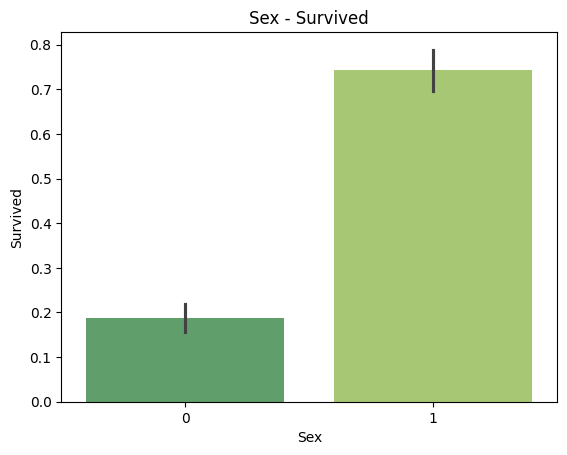

In [84]:
sns.barplot(x='Sex', y='Survived', data=df, palette='summer')
plt.title('Sex - Survived')
plt.show()

Let's see how a person's gender and ticket class (Pclass) affect survival rates

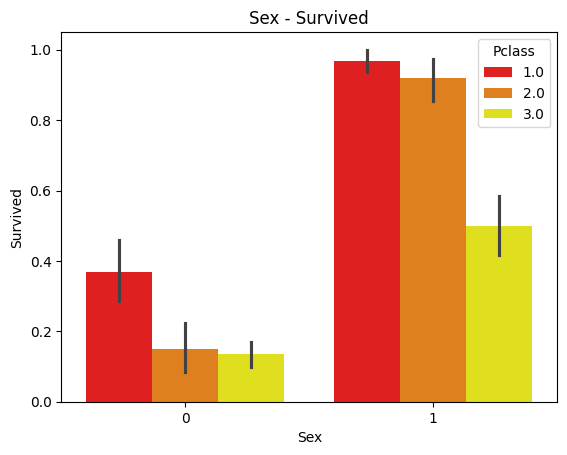

In [85]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Another useful type of visualization is the box plot box. Let's look at a box plot that reflects the distribution of passengers by gender and age.

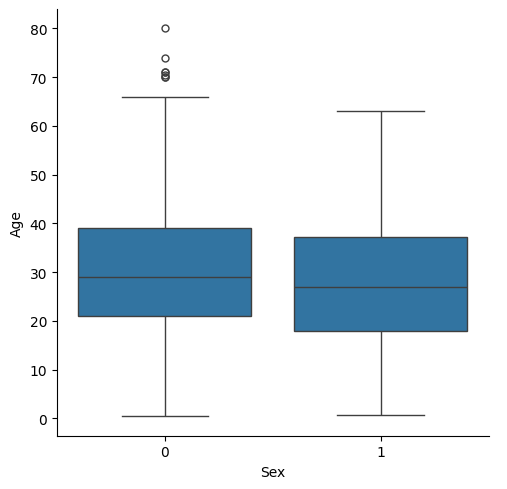

In [86]:
sns.catplot(x="Sex", y="Age", data=df, kind="box")
plt.show()

We can detail the picture by adding Pclass separation.

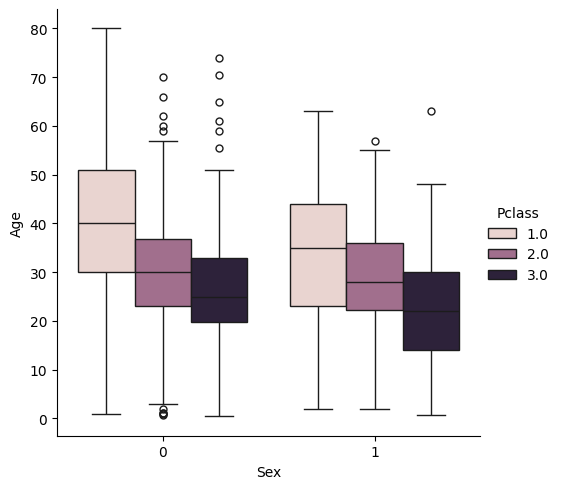

In [87]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=df, kind="box")
plt.show()

## Process the 'Embarked' feature

In [88]:
print(df['Embarked'].value_counts(dropna=False))
df.shape

Embarked
S      641
C      168
Q       75
NaN      2
Name: count, dtype: int64


(886, 12)

### Task 6
Remove passengers from the table for whom the port of embarkation (Embarked) is unknown.

In [89]:
# your code here
# removing rows where embarkation is unknown
df.dropna(subset=['Embarked'], inplace=True)

print(df['Embarked'].value_counts(dropna=False))
print("Updated shape of the DataFrame:", df.shape)

Embarked
S    641
C    168
Q     75
Name: count, dtype: int64
Updated shape of the DataFrame: (884, 12)


Let's convert the categorical column to numeric columns using One-Hot Encoding, namely, create three numeric columns as follows:

In [ ]:
# df['EmbS'] = df.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# df['EmbC'] = df.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# df['EmbQ'] = df.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

This operation can be done using the `get_dummies` method.

In [90]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


### Task 7
Remove the categorical column `Embarked` from the table and add new columns to it, obtained using `get_dummies`.

In [91]:
# your code here

embarked_dummies = pd.get_dummies(df['Embarked'])

df.drop(columns=['Embarked'], inplace=True)

df = pd.concat([df, embarked_dummies], axis=1)
print(df.head())

   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund; Mr. Owen Harris    0  22.0    1.0    0.0   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...    1  38.0    1.0    0.0   
2                             Heikkinen; Miss. Laina    1  26.0    0.0    0.0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)    1  35.0    1.0    0.0   
4                           Allen; Mr. William Henry    0  35.0    0.0    0.0   

             Ticket     Fare Cabin      C      Q      S  
0         A/5 21171   7.2500   NaN  False  False   True  
1          PC 17599  71.2833   C85   True  False  False  
2  STON/O2. 3101282   7.9250   NaN  False  False   True  
3            113803  53.1000  C123  False  False   True  
4     

## Process the 'Age' feature

Check if `Age` has any missing values.

In [92]:
df.Age.isna().sum()

175

Let's fill in the blanks with the median `Age` value.

In [93]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

/var/folders/cc/m3r6wr4s5450328h6_0_bqdw0000gn/T/ipykernel_2512/4033722866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


Let's plot the age distribution of the passengers.

/var/folders/cc/m3r6wr4s5450328h6_0_bqdw0000gn/T/ipykernel_2512/755151933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=False)


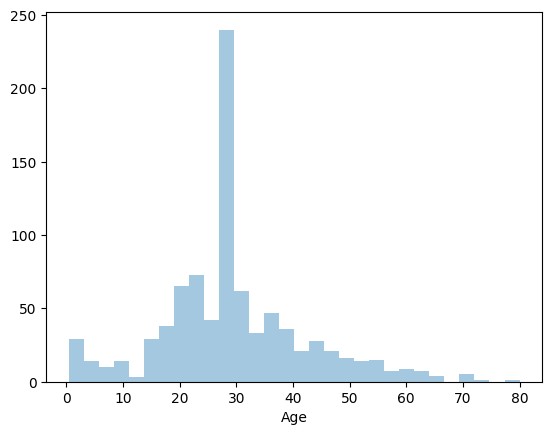

In [95]:
sns.distplot(df['Age'], kde=False)
plt.show()

We can also look at the age distribution of `Pclass`.

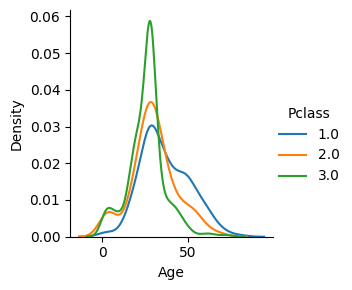

In [96]:
import seaborn as sns

facet = sns.FacetGrid(data=df, hue="Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

### Process the 'Fare' feature

1) Check if there are any missing values in `Fare`

2) If there are missing values, fill them with the _median_ value of `Fare`

In [103]:
# your code here
numberofemptyFares=df.Fare.isnull().sum()
print("Number of empty fare field are",numberofemptyFares)

if numberofemptyFares!=0:
    median_fares = df['Fare'].median()
    print("median value of fare field is",median_fares)
    df['Fare'].fillna(median_fares, inplace=True)

print("Number of empty fare field after filling it is",df.Fare.isna().sum())
print(df.head(10))

Number of empty fare field are 0
Number of empty fare field after filling it is 0
    PassengerId  Survived  Pclass  \
0           1.0       0.0     3.0   
1           2.0       1.0     1.0   
2           3.0       1.0     3.0   
3           4.0       1.0     1.0   
4           5.0       0.0     3.0   
6           7.0       0.0     1.0   
7           8.0       0.0     3.0   
8           9.0       1.0     3.0   
9          10.0       1.0     2.0   
10         11.0       1.0     3.0   

                                                 Name  Sex   Age  SibSp  \
0                             Braund; Mr. Owen Harris    0  22.0    1.0   
1   Cumings; Mrs. John Bradley (Florence Briggs Th...    1  38.0    1.0   
2                              Heikkinen; Miss. Laina    1  26.0    0.0   
3        Futrelle; Mrs. Jacques Heath (Lily May Peel)    1  35.0    1.0   
4                            Allen; Mr. William Henry    0  35.0    0.0   
6                             McCarthy; Mr. Timothy J    0  

### Process the 'Pclass' feature

Are there any missing values in `Pclass`?

In [33]:
df['Pclass'].value_counts(dropna=False)

Pclass
3.0    487
1.0    214
2.0    183
Name: count, dtype: int64

### Task 8
Draw a histogram of survival rates as a function of `Pclass`.

/var/folders/cc/m3r6wr4s5450328h6_0_bqdw0000gn/T/ipykernel_2512/1415533889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pclass'], kde=False)


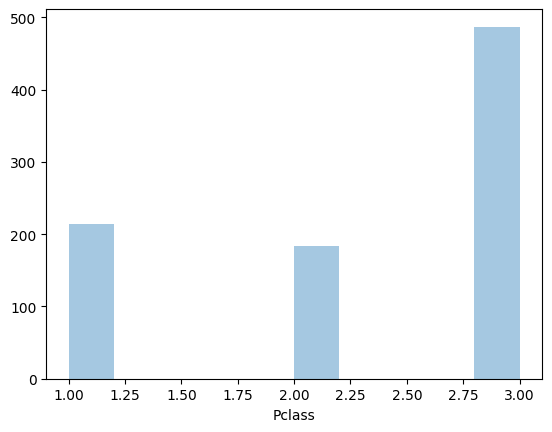

In [104]:
#your code here
sns.distplot(df['Pclass'], kde=False)
plt.show()

### Process the feature 'SibSp' (number of siblings, husbands, wives)

Are there any missing values in `SibSp`?

In [105]:
# your code here
numberofemptySibSp=df.SibSp.isna().sum()
print("Number of empty SibSp field are",numberofemptySibSp)
if numberofemptyFares!=0:
    median_SibSp = df['SibSp'].median()
    df['SibSp'].fillna(median_SibSp, inplace=True)

print("Number of empty SibSp field after filling it is",df.SibSp.isna().sum())

Number of empty SibSp field are 0
Number of empty SibSp field after filling it is 0


### Task 9
The `PassengerId` column is categorical and does not carry important information, delete it.

In [106]:
#your code here
# removing the 'PassengerId' column
df.drop(columns=['PassengerId'], inplace=True)
print(df.head())

   Survived  Pclass                                               Name  Sex  \
0       0.0     3.0                            Braund; Mr. Owen Harris    0   
1       1.0     1.0  Cumings; Mrs. John Bradley (Florence Briggs Th...    1   
2       1.0     3.0                             Heikkinen; Miss. Laina    1   
3       1.0     1.0       Futrelle; Mrs. Jacques Heath (Lily May Peel)    1   
4       0.0     3.0                           Allen; Mr. William Henry    0   

    Age  SibSp  Parch            Ticket     Fare Cabin      C      Q      S  
0  22.0    1.0    0.0         A/5 21171   7.2500   NaN  False  False   True  
1  38.0    1.0    0.0          PC 17599  71.2833   C85   True  False  False  
2  26.0    0.0    0.0  STON/O2. 3101282   7.9250   NaN  False  False   True  
3  35.0    1.0    0.0            113803  53.1000  C123  False  False   True  
4  35.0    0.0    0.0            373450   8.0500   NaN  False  False   True  
